# Assignment 4:
### รหัสนักศึกษา: 65130701717
### ชื่อ-นามสกุล: RATTAWIT PATTARACHAROENPONG
### หลักสูตร: SED

In [1]:
#for creating nn + loading dataset 
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers

#utilities
import numpy as np
import matplotlib.pyplot as plt

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Fashion MNIST image dataset

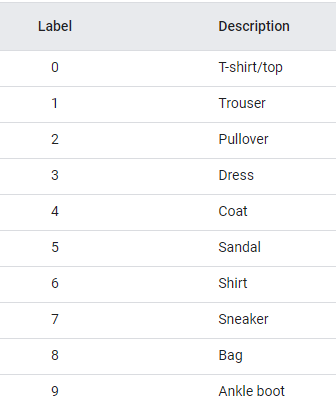

0. load ข้อมูลรูปภาพ fashion mnist 

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print('Train data size:',x_train.shape)
print('Classes: ',np.unique(y_train))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']


Train data size: (60000, 28, 28)
Classes:  [0 1 2 3 4 5 6 7 8 9]


1. แสดงตัวอย่างภาพที่โหลดมาได้ 1 ภาพ

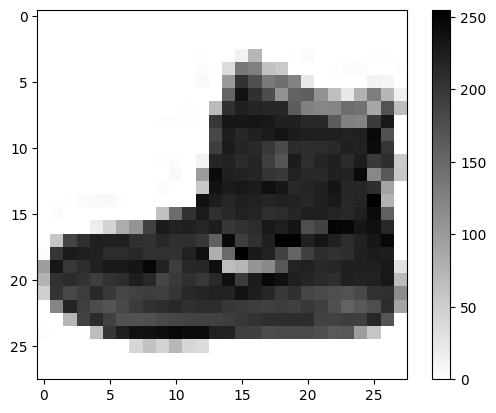

In [18]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.colorbar()
plt.show()

2. สร้างโครงสร้างของ Neural Networks ที่มี
- input layer เป็นตามขนาดภาพ 
- hidden layer 1 ชั้น จำนวน 128 node 
- output layer ตามจำนวนคลาส 

In [19]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation="relu")) 
model.add(layers.Dense(10, activation="softmax"))

model.summary() 

Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2023-03-08 22:52:02.289494: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-08 22:52:02.289623: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


3. แสดงการคำนวณ ค่าจำนวน Param #  100480 และ 1290

คำตอบ
* 100480 = 784*128+128
* 1290 = 128*10+10 

4. Compile และ กำหนดรปแบบการเรียนรู้ ได้แก่ optimizer, loss, metrics 
* optimizer = 'adam' 
* loss='sparse_categorical_crossentropy' 
* metrics=['accuracy']


In [28]:
model.compile(optimizer = 'adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])


5. ทำให้โมเดลเรียนรู้ด้วยชุดข้อมูลสอน กำนหนดจำนวนรอบ 10 รอบ

In [29]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2023-03-08 22:57:56.078932: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-08 22:57:56.289811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 4.3780 - accuracy: 0.6857
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7268 - accuracy: 0.7175
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5939 - accuracy: 0.7873
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5392 - accuracy: 0.8136
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5249 - accuracy: 0.8218
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5015 - accuracy: 0.8278
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5049 - accuracy: 0.8307
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4892 - accuracy: 0.8308
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4826 - accuracy: 0.8348
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4781 - accurac

6. ทำนายข้อมูลทดสอบ

In [40]:
pred = model.predict(x_test)
y_pred =np.argmax(pred,axis=1)

313/313 [==============================] - 0s 1ms/step


7. แสดงตัวอย่างภาพทดสอบและผลการทำนาย

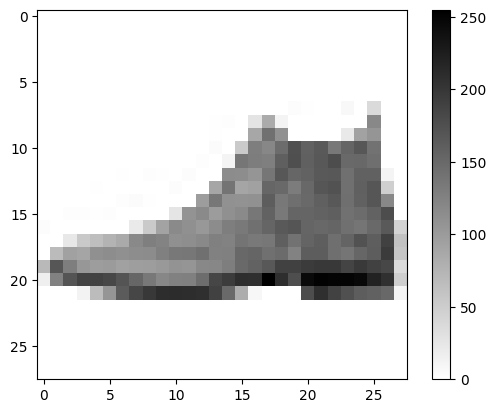

Class: Ankle boot


In [41]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.colorbar()
plt.show()

print('Class:', class_names[y_pred[0]])

8. หา confusion matrix และแสดง ค่าตัวชี้วัดประสิทธิภาพต่างๆ 

In [43]:
cfm = confusion_matrix(y_test,y_pred)
eval = classification_report(y_test,y_pred)
print(cfm)
print(eval)

[[703   2   7  53   4   2 217   0  12   0]
 [  1 949   6  31   4   1   7   0   1   0]
 [  8   1 502   8 280   0 200   0   1   0]
 [ 12  22   8 837  15   0 102   0   4   0]
 [  0   1  33  42 731   0 188   0   5   0]
 [  1   0   1   0   0 917   7  38   8  28]
 [ 86   1  66  39  78   0 688   0  42   0]
 [  0   0   0   0   0  29   0 948   3  20]
 [  1   1   0   7   2   1  38   5 945   0]
 [  0   0   0   0   0  33   1  55   0 911]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1000
           1       0.97      0.95      0.96      1000
           2       0.81      0.50      0.62      1000
           3       0.82      0.84      0.83      1000
           4       0.66      0.73      0.69      1000
           5       0.93      0.92      0.92      1000
           6       0.48      0.69      0.56      1000
           7       0.91      0.95      0.93      1000
           8       0.93      0.94      0.94      1000
           9       0.95     

9. ทำการสอนโมเดลและทดสอบในแต่ละรอบ เพื่อเก็บค่ามาไว้แสดงแนวโน้มประสิทธิภาพ โดยทำการ
* กำหนด epoch จำนวน 20 รอบ 
* validation_data=(x_test,y_test)

In [44]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
1873/1875 [============================>.] - ETA: 0s - loss: 0.4757 - accuracy: 0.8382

2023-03-08 23:07:51.654207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4758 - accuracy: 0.8382 - val_loss: 0.5886 - val_accuracy: 0.8093
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4802 - accuracy: 0.8376 - val_loss: 0.5330 - val_accuracy: 0.8301
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4701 - accuracy: 0.8410 - val_loss: 0.5289 - val_accuracy: 0.8281
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4622 - accuracy: 0.8419 - val_loss: 0.5930 - val_accuracy: 0.8212
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4610 - accuracy: 0.8430 - val_loss: 0.5774 - val_accuracy: 0.8217
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4605 - accuracy: 0.8430 - val_loss: 0.5336 - val_accuracy: 0.8248
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4661 - accuracy: 0.8411 - val_loss: 0.5362 - val_accuracy: 0.8176
Epo

10. แสดงประสิทธิภาพในแต่ละรอบ

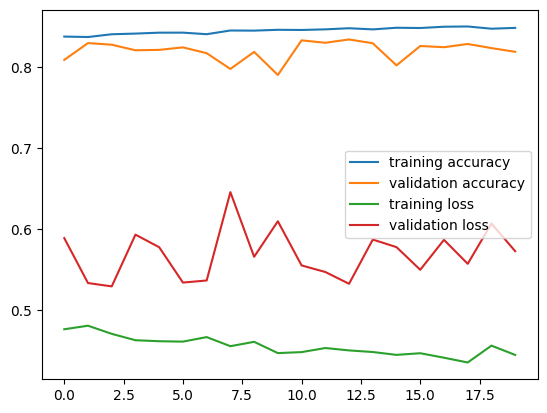

In [45]:

plt.plot(model.history.history['accuracy'], label='training accuracy')
plt.plot(model.history.history['val_accuracy'], label='validation accuracy')
plt.plot(model.history.history['loss'], label='training loss')
plt.plot(model.history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


## CIFAR-10 dataset with 3 hidden layers

In [46]:
#For Excercise: CIFAR-10 dataset 
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
print('Train data size:',x_train.shape)
print('Classes: ',np.unique(y_train))

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
               'frog', 'horse', 'ship', 'truck']


Train data size: (50000, 32, 32, 3)
Classes:  [0 1 2 3 4 5 6 7 8 9]


1. แสดงตัวอย่างรูป

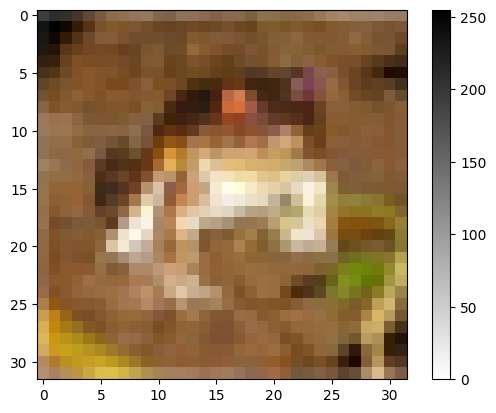

frog


In [52]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.colorbar()
plt.show()
print(class_names[y_train[0][0]])

2. สร้างโครงสร้างของ Neural Networks ที่มี
- input layer เป็นตามขนาดภาพ 
- hidden layer 3 ชั้น จำนวน 256, 128, 64 node 
- output layer ตามจำนวนคลาส 

In [53]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(256, activation="relu")) 
model.add(layers.Dense(128, activation="relu")) 
model.add(layers.Dense(64, activation="relu")) 
model.add(layers.Dense(10, activation="softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               786688    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


3. แสดงการคำนวณ ค่าจำนวน Param #  

* 786688 = 3072*256+256
* 32896 = 256*128+128
* 8256 = 128*64+64
* 650 = 64*10+10

4. Compile และ กำหนดรปแบบการเรียนรู้ ได้แก่ optimizer, loss, metrics  


In [60]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

5. ทำให้โมเดลเรียนรู้ด้วยชุดข้อมูลสอน  epochs=100, batch_size=64

In [63]:
model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test,y_test))

Epoch 1/100
782/782 [==============================] - 5s 7ms/step - loss: 1.4195 - accuracy: 0.4939 - val_loss: 1.5328 - val_accuracy: 0.4535
Epoch 2/100
782/782 [==============================] - 5s 7ms/step - loss: 1.4146 - accuracy: 0.4954 - val_loss: 1.5589 - val_accuracy: 0.4455
Epoch 3/100
782/782 [==============================] - 5s 6ms/step - loss: 1.4096 - accuracy: 0.4976 - val_loss: 1.5912 - val_accuracy: 0.4453
Epoch 4/100
782/782 [==============================] - 5s 6ms/step - loss: 1.4138 - accuracy: 0.4956 - val_loss: 1.5388 - val_accuracy: 0.4555
Epoch 5/100
782/782 [==============================] - 5s 6ms/step - loss: 1.4106 - accuracy: 0.4980 - val_loss: 1.5435 - val_accuracy: 0.4512
Epoch 6/100
782/782 [==============================] - 5s 6ms/step - loss: 1.4099 - accuracy: 0.5002 - val_loss: 1.6037 - val_accuracy: 0.4318
Epoch 7/100
782/782 [==============================] - 5s 6ms/step - loss: 1.4100 - accuracy: 0.4972 - val_loss: 1.5741 - val_accuracy: 0.4515

6. แสดงประสิทธิภาพในแต่ละรอบ

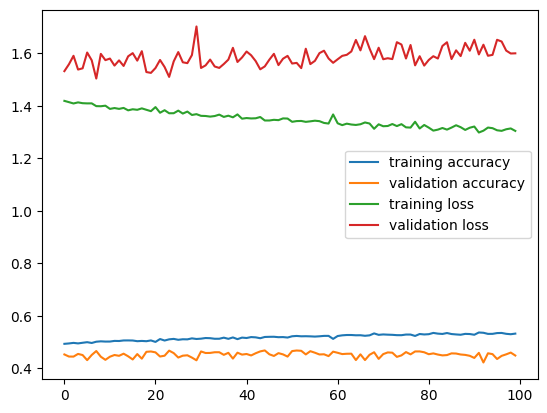

In [64]:
plt.plot(model.history.history['accuracy'], label='training accuracy')
plt.plot(model.history.history['val_accuracy'], label='validation accuracy')
plt.plot(model.history.history['loss'], label='training loss')
plt.plot(model.history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

6. ทำนายข้อมูลทดสอบ

In [66]:
pred = model.predict(x_test)
y_pred =np.argmax(pred,axis=1)

313/313 [==============================] - 1s 2ms/step


8. หา confusion matrix และแสดง ค่าตัวชี้วัดประสิทธิภาพต่างๆ 

In [68]:
cfm = confusion_matrix(y_test,y_pred)
eval = classification_report(y_test,y_pred)
print(cfm)
print(eval)

[[354  20  81  41 135  12  39  49 206  63]
 [ 20 484  36  21  21  21  37  34  91 235]
 [ 42  15 321  73 240  81 132  52  21  23]
 [  7  12  97 280 115 183 192  40  32  42]
 [ 16   5 129  54 522  37 139  59  28  11]
 [  4   7 133 189 101 331 129  57  31  18]
 [  2   9  90  86 152  53 561  15  16  16]
 [ 13   8  82  58 214  97  36 446  15  31]
 [ 46  34  28  54  70  16  11  17 633  91]
 [ 17 127  21  44  32  17  31  72  77 562]]
              precision    recall  f1-score   support

           0       0.68      0.35      0.47      1000
           1       0.67      0.48      0.56      1000
           2       0.32      0.32      0.32      1000
           3       0.31      0.28      0.29      1000
           4       0.33      0.52      0.40      1000
           5       0.39      0.33      0.36      1000
           6       0.43      0.56      0.49      1000
           7       0.53      0.45      0.48      1000
           8       0.55      0.63      0.59      1000
           9       0.51     

## CIFAR-10 dataset with CNN

In [69]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

1. แสดงการคำนวณ Param #

* 896 = 3 * 3 * 3 * 32 + 32
* 18496 = 3 * 3 * 32 * 64 + 64
* 36928 = 3 * 3 * 64 * 64 + 64
* 65600 = 1024 * 64 + 64
* 650 = 64 * 10 + 10

2. compile และ fit จำนวน 10 epoch  batch_size = 64,

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size = 64,
                    validation_data=(x_test, y_test))

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2023-03-08 23:43:21.959646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.8262 - accuracy: 0.3733

2023-03-08 23:43:32.093214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 11s 13ms/step - loss: 1.8262 - accuracy: 0.3733 - val_loss: 1.4484 - val_accuracy: 0.4806
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 1.3322 - accuracy: 0.5236 - val_loss: 1.4483 - val_accuracy: 0.4774
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 1.1648 - accuracy: 0.5863 - val_loss: 1.1282 - val_accuracy: 0.6000
Epoch 4/10
782/782 [==============================] - 10s 12ms/step - loss: 1.0429 - accuracy: 0.6320 - val_loss: 1.2702 - val_accuracy: 0.5661
Epoch 5/10
782/782 [==============================] - 10s 12ms/step - loss: 0.9621 - accuracy: 0.6653 - val_loss: 1.0331 - val_accuracy: 0.6407
Epoch 6/10
782/782 [==============================] - 10s 12ms/step - loss: 0.8949 - accuracy: 0.6874 - val_loss: 1.1272 - val_accuracy: 0.6268
Epoch 7/10
782/782 [==============================] - 10s 12ms/step - loss: 0.8316 - accuracy: 0.7103 - val_loss: 1.0120 - val_accuracy: 0.6599
Epo

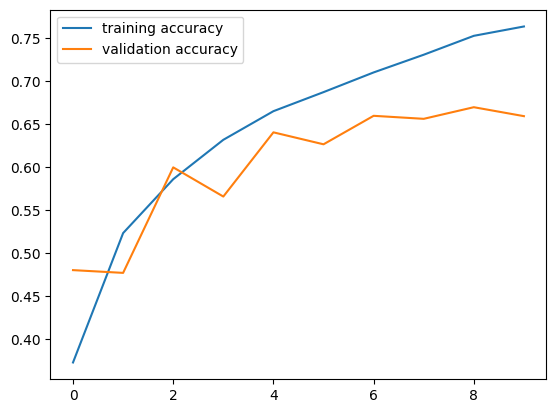

In [77]:
plt.plot(model.history.history['accuracy'], label='training accuracy')
plt.plot(model.history.history['val_accuracy'], label='validation accuracy')
# plt.plot(model.history.history['loss'], label='training loss')
# plt.plot(model.history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

## CIFAR-10 dataset with VGG16

In [73]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2


In [78]:
# #--------------------------- VGG16 Transfer Learning -------------------
base = VGG16(include_top=False, weights='imagenet')
# base = MobileNetV2(include_top=False, weights='imagenet')
# base = ResNet50(include_top=False, weights='imagenet')
base.trainable = False
base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [79]:
model = keras.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))
model.add(base)
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


In [80]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [81]:
model.fit(x_train, y_train, epochs=10, batch_size = 64,
                    validation_data=(x_test, y_test))

Epoch 1/10
  1/782 [..............................] - ETA: 4:33 - loss: 29.5719 - accuracy: 0.1250

2023-03-08 23:49:37.897646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 5.9148 - accuracy: 0.4467

2023-03-08 23:49:53.720429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 19s 24ms/step - loss: 5.9148 - accuracy: 0.4467 - val_loss: 2.7612 - val_accuracy: 0.5231
Epoch 2/10
782/782 [==============================] - 18s 23ms/step - loss: 2.0544 - accuracy: 0.5434 - val_loss: 1.6775 - val_accuracy: 0.5518
Epoch 3/10
782/782 [==============================] - 18s 23ms/step - loss: 1.6300 - accuracy: 0.5490 - val_loss: 1.5906 - val_accuracy: 0.5481
Epoch 4/10
782/782 [==============================] - 18s 24ms/step - loss: 1.5730 - accuracy: 0.5510 - val_loss: 1.6321 - val_accuracy: 0.5290
Epoch 5/10
782/782 [==============================] - 18s 23ms/step - loss: 1.5854 - accuracy: 0.5481 - val_loss: 1.6169 - val_accuracy: 0.5384
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 1.5867 - accuracy: 0.5486 - val_loss: 1.6979 - val_accuracy: 0.5257
Epoch 7/10
782/782 [==============================] - 18s 23ms/step - loss: 1.5770 - accuracy: 0.5478 - val_loss: 1.6106 - val_accuracy: 0.5527
Epo

## R G B

1. อ่าน frame ภาพจาก วิดีโอ 

In [ ]:
import cv2

#### Explore Color ####
cap = cv2.VideoCapture(...)
while True:
    _,frame = cap.read()
    print(frame.shape)

    #BGR
    R = frame[:,:,2]
    G = frame[:,:,1]
    B = frame[:,:,0]

    cv2.imshow("frame",frame)
    cv2.imshow("R",R)
    cv2.imshow("G",G)
    cv2.imshow("B",B)

    key = cv2.waitKey(1) #& 0xFF
    if key == ord('q'):
        break

cv2.destroyAllWindows()




2. แสดงรูป Original, R, G, B ที่ทำเอง 

3. ตรวจจับวัตถุด้วย color threshold

In [ ]:
import cv2
### Object Detection with Color Threshold ###
cap = cv2.VideoCapture(..)
while True:
    _,frame = cap.read()
    print(frame.shape)

    #BGR
    R = frame[:,:,2]
    G = frame[:,:,1]
    B = frame[:,:,0]

    cv2.imshow("frame",frame)

    obj = (R...) & (G...) & (B...)
    obj = 1.0*blue_pen
    cv2.imshow("... Detection", obj)

    key = cv2.waitKey(1) #& 0xFF
    if key == ord('q'):
        break

cv2.destroyAllWindows()


4. แสดงตัวอย่างการตรวจจับวัตถุด้วยค่าสี

5. เขียนโปรแกรมเก็บภาพ อย่างน้อย 2 คลาส

In [ ]:
import cv2
import time

#### Read From USB Camera ####
cap = cv2.VideoCapture(0) 
while True:
    _,frame = cap.read()
    print(frame.shape)
    cv2.imshow("frame",frame)

    key = cv2.waitKey(1) #& 0xFF

    if key == ord('...'):
        timestr = time.strftime("%Y%m%d-%H%M%S")
        cv2.imwrite(filename="Images/.../" + timestr + ".jpg", img = frame)

    if key == ord('...'):
        timestr = time.strftime("%Y%m%d-%H%M%S")
        cv2.imwrite(filename="Images/.../" + timestr + ".jpg", img = frame)

    if key == ord('q'):
        break

cv2.destroyAllWindows()



6. แสดงตัวอย่างภาพที่อยู่ใน โฟลเดอร์แต่ละคลาส

## CNN pre-trained

In [ ]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers

train_ds = keras.utils.image_dataset_from_directory(
    directory='Dataset/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224))
test_ds = keras.utils.image_dataset_from_directory(
    directory='Dataset/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224))



2. แสดงชื่อคลาส

In [ ]:
class_names = train_ds.class_names
print(class_names)

3. สร้างชั้น CNN  โดยใช้ package VGG16 กำหนด ดังนี้ 
- ไม่เอาชั้น fully connected nn โดยกำหนด include_top=False
- weights='imagenet'
- input_shape=(224,224,3)




In [5]:
from tensorflow.keras.applications.vgg16 import VGG16  #https://keras.io/api/applications/vgg/
import numpy as np

base = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

4. แสดงโครงสร้างของ base model ในข้อ 3


5. กำหนดให้ไม่ต้องมีการปรับค่า weight ของ base model

In [7]:
base.trainable = ...

6. กำหนดโครงสร้างของโมเดล สำหรับสอนข้อมูลภาพที่เราสร้างไว้ 

In [ ]:
model = keras.Sequential()
model.add(base)
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))
model.summary() 

7. กำหนดรูปแบบ การเรียนรู้ 
- loss='categorical_crossentropy' 
- optimizer='adam'
- metrics=['accuracy']

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

8. ให้โมเดลเรียนรู้จากข้อมูลสอน จำนวน 10 รอบ และกำหนด validation_data=test_ds

In [10]:
model.fit(train_ds, epochs=..., validation_data=test_ds)

Epoch 1/10
2/2 [==============================] - 9s 6s/step - loss: 13.1167 - accuracy: 0.3906 - val_loss: 4.5413e-07 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 9s 6s/step - loss: 1.4223 - accuracy: 0.8281 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 13s 8s/step - loss: 0.0624 - accuracy: 0.9844 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 13s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 13s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 13s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 13s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.

9. บันทึก model ชื่อ 6xxxxxxx_model.h5

In [13]:
model.save('6xxxxxxx_model.h5')

10. อ่านภาพ และทำนาย ภาพ ว่าอยู่คลาสใด

In [19]:
import cv2
im = cv2.imread('.....')
imrz = cv2.resize(im,(224,224))
im_arr = tf.keras.utils.img_to_array(imrz)
im_arr = np.array([im_arr])  # Convert single image to a batch.
predictions = model.predict(im_arr)
str_class = class_names[predictions.argmax()]
print('Class: ', str_class)

image = cv2.putText(im,str_class,(50, 70), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_AA)

cv2.imshow("image", image)
cv2.waitKey()



1/1 [==============================] - 0s 142ms/step
Class:  hand-zero


13

11. Optional

In [ ]:
cap = cv2.VideoCapture(1)
while True:
    _,frame = cap.read()
    print(frame.shape)
    im = cv2.resize(frame,(224,224))
    str_class = class_names[model.predict(np.array([im]))[0].argmax()]
        
    image = cv2.putText(frame,str_class,(50, 70), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_AA)
    
    cv2.imshow("frame",image)

    key = cv2.waitKey(1) #& 0xFF
    if key == ord('q'):
        break

cv2.destroyAllWindows()


แสดงตัวอย่างผลงาน